<a href="https://colab.research.google.com/github/Shashank-177/Shashank/blob/main/Galaxies_TPCF_determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       #CATAID          RA       DEC         Z  weight
0       296833  219.508070 -1.246349  0.174283     1.0
1       238120  214.995892  2.616149  0.119388     1.0
2       507919  212.481747 -0.554405  0.106291     1.0
3       486537  214.551348 -0.907003  0.175703     1.0
4       505314  220.343176 -1.450728  0.157823     1.0
...        ...         ...       ...       ...     ...
29020    93528  215.040779  1.907852  0.173369     1.0
29021   343829  220.911543  1.532645  0.190871     1.0
29022   619362  220.400916  2.017539  0.171068     1.0
29023    79274  223.421982 -1.697075  0.195816     1.0
29024    77846  219.781444 -1.009349  0.165717     1.0

[29025 rows x 5 columns]


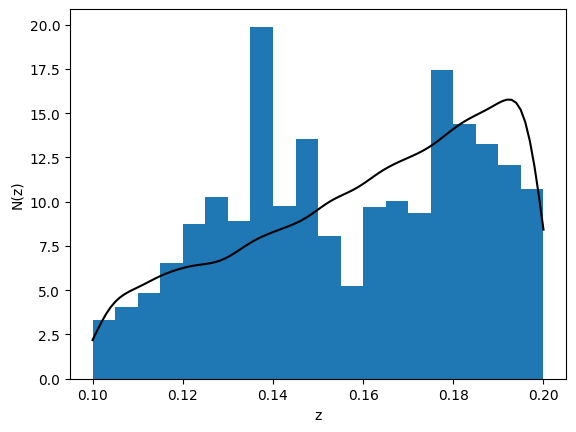

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

data = pd.read_table('real_galaxies')
data1 = pd.read_table('random_galaxies')

print(data1)
z = data['z']
z1= data1['Z']
plt.hist(z,20,density = True)
density = gaussian_kde(z1)
x_vals = np.linspace(z1.min(), z1.max(), 100)
plt.plot(x_vals, density(x_vals), color='black')
plt.xlabel('z')
plt.ylabel('N(z)')

plt.show()

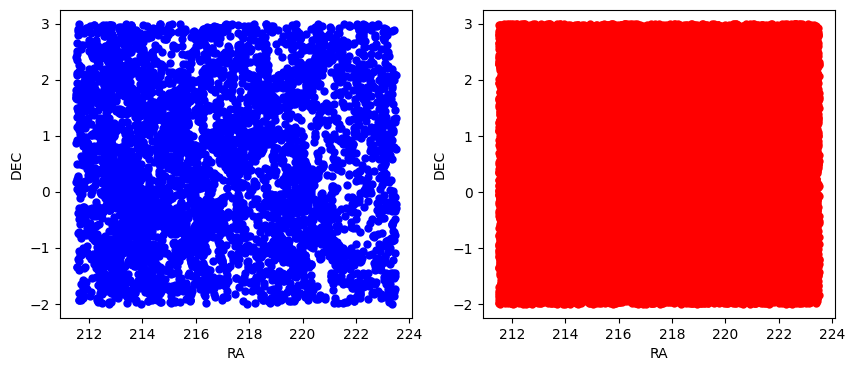

In [ ]:
#print(data)
RA = data['ra']
DEC = data['dec']
RA1 = data1['RA']
DEC1 = data1['DEC']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(RA, DEC, color='blue',linewidths = 1*10**-7)
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
ax2.scatter(RA1, DEC1, color='red',linewidths = 1e-22)
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')

#plt.scatter(RA1,DEC1,color = 'red')
plt.show()

Text(0, 0.5, 'DEC$[^\\circ]$')

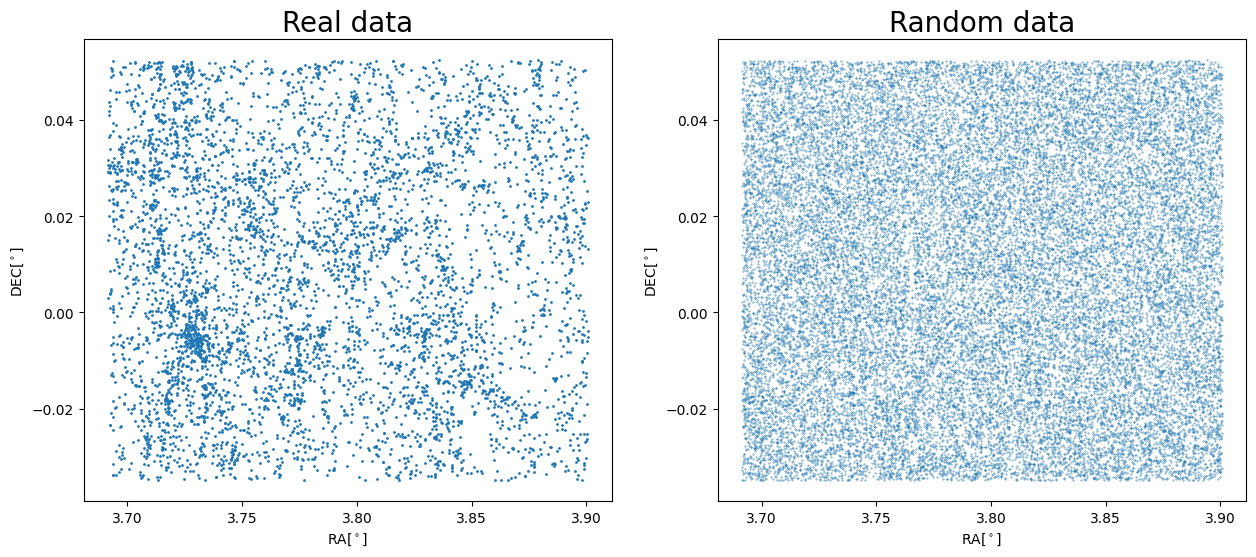

In [ ]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Initialize number of bins
nbins = 500
RA = data['ra']*(np.pi/180)
DEC = data['dec']*(np.pi/180)
RA1 = data1['RA']*(np.pi/180)
DEC1 = data1['DEC']*(np.pi/180)
fig, axs = plt.subplots(1, 2,figsize = (15,6))

# Scatter plot of real galaxy data
ax = axs[0]
ax.scatter(RA, DEC, s=1)
ax.set_title('Real data', fontsize=20)
ax.set_xlabel('RA' + r'$[^\circ]$')
ax.set_ylabel('DEC' + r'$[^\circ]$')
#print(RA)
# Scatter plot of random galaxy data
ax = axs[1]
ax.scatter(RA1, DEC1, s=0.1)
ax.set_title('Random data', fontsize=20)
ax.set_xlabel('RA' + r'$[^\circ]$')
ax.set_ylabel('DEC' + r'$[^\circ]$')

In [ ]:
from astropy.cosmology import Planck15
def L_D(z):
   return Planck15.luminosity_distance(z).value
D_l = np.array([])
for i in z:
  value = L_D(i)
  D_l = np.append(value,D_l)
print(D_l)
D_l1 = np.array([])
for i in z1:
  value = L_D(i)
  D_l1 = np.append(value,D_l1)

r=np.array([])
for i in range(len(D_l)):
  value = D_l[i]/(1+z[i])
  r = np.append(value,r)
print(r)
print(len(r))
r1=np.array([])
for i in range(len(D_l1)):
  value = D_l1[i]/(1+z1[i])
  r1 = np.append(value,r1)

# r_ = np.vectorize(r)
# r1_ = np.vectorize(r1)
# print(r_)

[482.69329722 529.45883283 592.00458593 ... 817.81187102 628.4266156
 548.54334762]
[498.01929059 565.8391475  728.42663824 ... 508.11918901 468.68036331
 433.17296398]
5805


In [ ]:
pip install numpy cython mpi4py

In [ ]:
pip install nbodykit[extras]

In [ ]:
from nbodykit.lab import *

dd = SimulationBoxPairCount('1d', data1=data, data2=None, edges=r, BoxSize=box, Nmu=5, show_progress=True)

In [ ]:
import math
def ang_sep(ra1, dec1, ra2, dec2):
  y = np.sin(dec1)*np.sin(dec2)+np.cos(dec1)*np.cos(dec2)*np.cos(ra1-ra2)
  return y

def sep(r1,r2,ra1, dec1, ra2, dec2):
  y = ang_sep(ra1, dec1, ra2, dec2)
  r = np.sqrt(r1**2 + r2**2 - 2*r1*r2*y)
  return r

#print(linear_separation(RA[0],DEC[0],RA[1],DEC[1]))
# for i in range(len(RA)):
#   for j in range(len(RA)):
#     if i!=j:
#       value = linear_separation(RA[i],DEC[i],RA[j],DEC[j])




In [ ]:
from scipy.spatial import cKDTree
from joblib import Parallel, delayed

x = r*np.cos(DEC)*np.sin(RA)
y= r*np.cos(DEC)*np.cos(RA)
z = r*np.sin(DEC)
result = np.column_stack((x,y,z))
dist = np.array(result)
print(dist)


[[-261.79574652 -423.62166798    5.55727668]
 [-297.93274012 -480.98271901    8.10229711]
 [-384.91010202 -618.35564838    9.26675676]
 ...
 [-348.72196336 -369.52873748   -5.1589426 ]
 [-281.57573044 -374.60896812    6.67173066]
 [-261.82125871 -345.05076602    5.33048543]]


In [ ]:
y = [0.15, 0.30, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27, 47.5]
DD = np.array([])
for i in y:

  num_cores = 4
  treed = cKDTree(dist)
  neighbors = treed.count_neighbors(treed,i+1,cumulative=False)
  neighbors -= treed.count_neighbors(treed, i, cumulative=False)
  DD = np.append(neighbors,DD)

DD = np.flip(DD)
print(DD)

[   476.    602.    710.   1144.   1784.   3394.   6650.  14942.  33134.
  72802. 128392.]


In [ ]:
tree_practice = cKDTree(np.column_stack((RA,DEC,r)))
DD = np.array([])
for i in y:

  num_cores = 4

  neighbors = tree_practice.count_neighbors(tree_practice,i,cumulative=False)
  pairs_DD -= tree_data.count_neighbors(tree_data, r_bins[i], cumulative=False)

  DD = np.append(neighbors,DD)

print(DD)


[7.175085e+06 4.116903e+06 2.208603e+06 1.023777e+06 3.681010e+05
 1.076230e+05 2.989500e+04 1.250900e+04 7.021000e+03 6.299000e+03
 5.905000e+03]


In [ ]:
x1 = r1*np.cos(DEC1)*np.sin(RA1)
y1= r1*np.cos(DEC1)*np.cos(RA1)
z1 = r1*np.sin(DEC1)
result1 = np.column_stack((x1,y1,z1))
dist1 = np.array(result1)
print(dist1)

[[-473.67471408 -574.44850876  -16.19873229]
 [-275.36308389 -393.31925654   21.93818501]
 [-232.64873397 -365.44222226   -4.19198269]
 ...
 [-497.95809193 -585.07982705   27.06500652]
 [-606.3371193  -640.6909669   -26.13553575]
 [-447.41443334 -537.35726057  -12.3193589 ]]


In [ ]:
y = [0.15, 0.30, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27, 47.5]
RR = np.array([])
for i in y:

  num_cores = 4
  treer = cKDTree(dist1)
  neighbors1 = treer.count_neighbors(treer,i+1,cumulative=False)
  neighbors1 -= treer.count_neighbors(treer,i, cumulative=False)
  #separations = Parallel(n_jobs=num_cores)(delayed(sep)(r[i],r[j],RA[i],DEC[i],RA[j],DEC[j]) for i, neighbor_list in enumerate(neighbors) for j in neighbor_list if i!=j)
  RR = np.append(neighbors1,RR)

RR = np.flip(RR)
print(RR)

[1.374000e+03 1.944000e+03 2.668000e+03 5.600000e+03 1.126000e+04
 2.835600e+04 7.351400e+04 2.023100e+05 5.469960e+05 1.424260e+06
 2.937076e+06]


In [ ]:
dist2 = []
for i in range(len(result)):
    dist2.append(result[i])
for j in range(len(result1)):
    dist2.append(result1[i])

print(dist2)

In [ ]:
num_cores = 4
tree = cKDTree(dist2)
neighbors = tree.query_ball_tree(tree, r=0.15)
separations = Parallel(n_jobs=num_cores)(delayed(sep)(r[i],r1[j],RA[i],DEC[i],RA1[j],DEC1[j]) for i, neighbor_list in enumerate(neighbors) for j in neighbor_list if i!=j)
DR = len(separations)

In [ ]:
DR = np.array([])
for i in y:

  num_cores = 4
  #treedr = cKDTree(dist2)
  neighbors2 = treed.count_neighbors(treer,i+1,cumulative=False)
  neighbors2 -= treed.count_neighbors(treer, i, cumulative=False)
  #separations = Parallel(n_jobs=num_cores)(delayed(sep)(r[i],r[j],RA[i],DEC[i],RA[j],DEC[j]) for i, neighbor_list in enumerate(neighbors) for j in neighbor_list if i!=j)
  DR = np.append(neighbors2,DR)
DR = np.flip(DR)
print(DR)

[2.87000e+02 4.14000e+02 5.44000e+02 1.12300e+03 2.27200e+03 5.65000e+03
 1.52000e+04 4.19540e+04 1.15253e+05 2.97146e+05 5.90424e+05]


In [ ]:
dist2 = []
for i in range(len(result)):
    dist2.append(result[i])
for j in range(len(result1)):
    dist2.append(result1[i])

print(dist2)

In [ ]:
num_cores = 4
tree = cKDTree(dist2)
neighbors = tree.query_ball_tree(tree, r=0.15)
separations = Parallel(n_jobs=num_cores)(delayed(sep)(r[i],r1[j],RA[i],DEC[i],RA1[j],DEC1[j]) for i, neighbor_list in enumerate(neighbors) for j in neighbor_list if i!=j)
DR = len(separations)

In [ ]:
from joblib import Parallel, delayed
num_cores = 4
y = [0.15, 0.30, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27, 47.5]
dd = []
separations = Parallel(n_jobs=num_cores)(delayed(sep)(r[i],r[j],RA[i],DEC[i],RA[j],DEC[j]) for i in range(len(r)) for j in range(len(r)) if i!=j)


In [ ]:
rr = []
for i in range(len(r1)):
  for j in range(len(r1)):
    if i!= j :
      value = sep(r1[i],r1[j],RA1[i],RA1[j],DEC1[i],DEC1[j])
      freq,e = np.histogram[value, y]
      rr.append(freq)

In [ ]:
dr = []
for i in range(len(r)):
      value = sep(r[i],r1[i+1],RA[i],RA1[i+1],DEC[i],DEC1[i+1])
      freq,e = np.histogram[value, y]
      dr.append(freq)

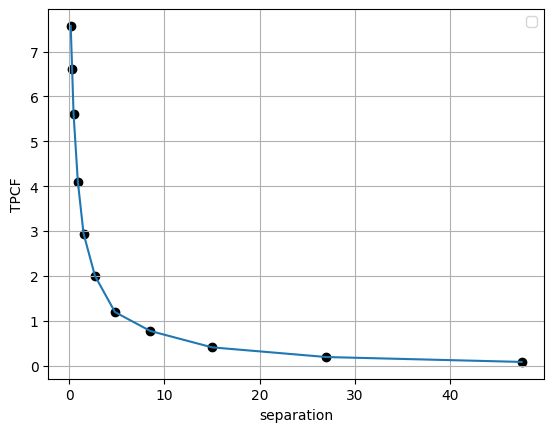

In [ ]:
y = [0.15, 0.30, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27, 47.5]
Nr = len(z1)
Nd = len(z)
def tpcf(DD,RR,DR):
  value = 1 + (Nr/Nd)**2*(DD/RR)
  return value - 2*(Nr/Nd)*(DR/RR)

plt.plot(y,tpcf(DD,RR,DR))
plt.scatter(y,tpcf(DD,RR,DR),color ='black')
plt.grid()
plt.xlabel("separation")
plt.ylabel("TPCF")
plt.legend()
plt.show()

0.5834872265823754
11
11


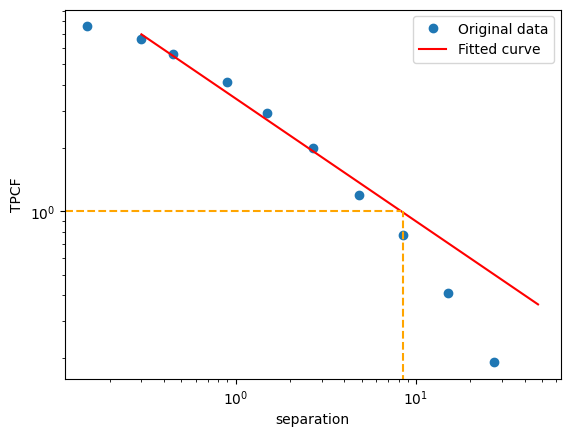

In [ ]:

from scipy.optimize import curve_fit

def func(x, x0, y):
    return (x/x0)**(-y)

# calculate optimized parameter values for func using curve_fit
popt, pcov = curve_fit(func, y[1:], tpcf(DD[1:],RR[1:],DR[1:]))

# extract optimized parameter values for x0 and y
x0_fit = popt[0]
y_fit = popt[1]
print(y_fit)
# create a new array of y-values based on the optimized parameter values
y_fit_values = func(y[1:], x0_fit, y_fit)
print(len(y))
print(len(tpcf(DD,RR,DR)))
# plot original data and fitted curve
plt.loglog(y[:10], tpcf(DD[:10],RR[:10],DR[:10]), 'o', label='Original data')
plt.loglog(y[1:], y_fit_values, 'r-', label='Fitted curve')
plt.hlines(10**0,0,x0_fit,'orange',linestyle = '--')
plt.vlines(8.5,0,1,'orange',linestyle = '--')
plt.xlabel("separation")
plt.ylabel("TPCF")
plt.legend()
plt.show()

In [ ]:
print(tpcf(DD,RR,DR))

[7.5720524  6.61213992 5.61394303 4.10178571 2.94316163 1.9997884
 1.19384063 0.7726756  0.40734484 0.19157317 0.08261141]
